# Árvores de Decisão: Classificação

## Importação das bibliotecas

In [1]:
# Pacotes de preparação dos dados
import pandas as pd
import numpy as np

# Pacotes gráficos
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# from dtreeviz.trees import dtreeviz

# Pacotes de modelagem
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

# Módulo de Análise Exploratória
import aed

## Importação da base de dados

In [2]:
df_rh = pd.read_csv('base_rh.csv',sep=',')
df_rh.head()

,Funcionario_Deixou_Empresa,Freq_Viagens,Formacao,Estado_Civil,Faz_hora_extras,Equilibrio_de_Vida,Idade,Tempo_de_empresa
0,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Ruim,41,6
1,Não,Viaja frequentemente,Ensino Médio,Casado,Não,Muito bom,49,10
2,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Muito bom,37,0
3,Não,Viaja frequentemente,Mestrado,Casado,Sim,Muito bom,33,8
4,Não,Viaja raramente,Ensino Médio,Casado,Não,Muito bom,27,2


## Preparação dos Dados

### Missing Values

In [3]:
df_rh.isnull().sum()

Funcionario_Deixou_Empresa    0
Freq_Viagens                  0
Formacao                      0
Estado_Civil                  0
Faz_hora_extras               0
Equilibrio_de_Vida            0
Idade                         0
Tempo_de_empresa              0
dtype: int64

### Duplicações

In [4]:
df_rh.index.duplicated().sum()

0

### Tipos de Variáveis

In [5]:
df_rh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Funcionario_Deixou_Empresa  1470 non-null   object
 1   Freq_Viagens                1470 non-null   object
 2   Formacao                    1470 non-null   object
 3   Estado_Civil                1470 non-null   object
 4   Faz_hora_extras             1470 non-null   object
 5   Equilibrio_de_Vida          1470 non-null   object
 6   Idade                       1470 non-null   int64 
 7   Tempo_de_empresa            1470 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 92.0+ KB


## Análise Exploratória dos Dados

### Dispersão por Classe

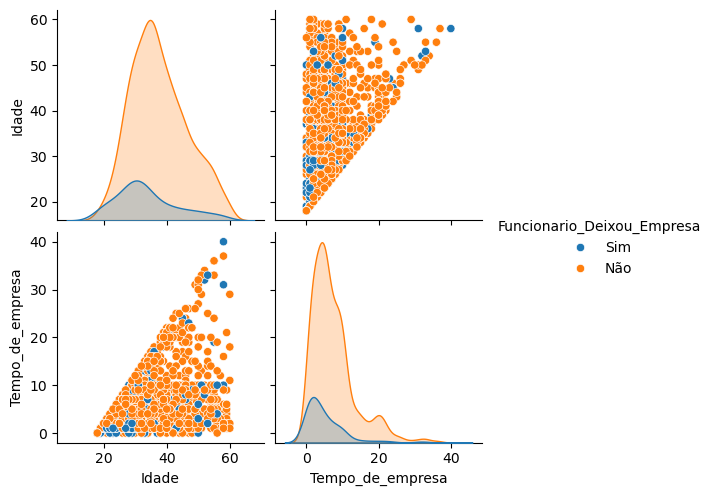

In [6]:
import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')

sns.pairplot(df_rh, hue='Funcionario_Deixou_Empresa');

### Information Value - IV

In [7]:
df_rh['Target'] = np.where(df_rh['Funcionario_Deixou_Empresa'] == 'Sim', 1, 0)

df_rh_iv = aed.analise_iv(df_rh, 
                          'Target')
df_rh_iv.get_lista_iv()

C:\Users\Instrutor\Documents\JoaoGoncalves\Curso Completo - Programacao Python p DataScience\07 - Aplicações em Data Science\02 - Árvores de Decisão\2_Arvores_Decisao_Turnover_Resolvido\aed.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[nome_var] = pd.qcut(df_num[var],
C:\Users\Instrutor\Documents\JoaoGoncalves\Curso Completo - Programacao Python p DataScience\07 - Aplicações em Data Science\02 - Árvores de Decisão\2_Arvores_Decisao_Turnover_Resolvido\aed.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df2 = df_aux.pivot_table(values='target2',
C:\Users\Instrutor\Doc

Target,IV
Variavel,
Funcionario_Deixou_Empresa,9.21
Faz_hora_extras,0.40
Tempo_de_empresa,0.34
Idade,0.31
Estado_Civil,0.22
Freq_Viagens,0.13
Equilibrio_de_Vida,0.06
Formacao,0.01


In [8]:
df_rh_iv.get_bivariada(var_escolhida='Faz_hora_extras')

==> "Faz_hora_extras" tem IV de 0.4


Target,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Faz_hora_extras,Não,110.0,944.0,1054.0,71.7,46.41,76.56,10.44,0.61,-0.49,0.15
1,Faz_hora_extras,Sim,127.0,289.0,416.0,28.3,53.59,23.44,30.53,2.29,0.83,0.25


In [9]:
df_rh_iv.get_bivariada(var_escolhida='Tempo_de_empresa')

==> "Tempo_de_empresa" tem IV de 0.34


Target,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Tempo_de_empresa,"(-0.01, 1.0]",75.0,140.0,215.0,14.63,31.65,11.35,34.88,2.79,1.03,0.21
1,Tempo_de_empresa,"(1.0, 2.0]",27.0,100.0,127.0,8.64,11.39,8.11,21.26,1.40,0.34,0.01
2,Tempo_de_empresa,"(2.0, 3.0]",20.0,108.0,128.0,8.71,8.44,8.76,15.62,0.96,-0.04,0.00
3,Tempo_de_empresa,"(3.0, 5.0]",40.0,266.0,306.0,20.82,16.88,21.57,13.07,0.78,-0.25,0.01
4,Tempo_de_empresa,"(5.0, 7.0]",20.0,146.0,166.0,11.29,8.44,11.84,12.05,0.71,-0.34,0.01
5,Tempo_de_empresa,"(7.0, 9.0]",17.0,145.0,162.0,11.02,7.17,11.76,10.49,0.61,-0.49,0.02
6,Tempo_de_empresa,"(9.0, 10.0]",18.0,102.0,120.0,8.16,7.59,8.27,15.00,0.92,-0.08,0.00
7,Tempo_de_empresa,"(10.0, 15.0]",7.0,101.0,108.0,7.35,2.95,8.19,6.48,0.36,-1.02,0.05
8,Tempo_de_empresa,"(15.0, 40.0]",13.0,125.0,138.0,9.39,5.49,10.14,9.42,0.54,-0.62,0.03


### Relatórios Pandas Profiling e SweetViz

In [10]:
perfil_pp, perfil_sv = aed.gera_relatorios_aed(df=df_rh,
                                               target_feat='Target')

AttributeError: 'DataFrame' object has no attribute 'profile_report'

## Desenvolvimento do Modelo: Árvores de Decisão
Neste exemplo utilizaremos a biblioteca Scikit Learn, uma das mais utilizadas para o desenvolvimento de modelos de *Machine Learning*.

### Definição do *Target* e das *Features*

In [11]:
# Criação das variáveis dummies
df_rh_modelo = pd.get_dummies(df_rh)
df_rh_modelo.head()

,Idade,Tempo_de_empresa,Target,Funcionario_Deixou_Empresa_Não,Funcionario_Deixou_Empresa_Sim,Freq_Viagens_Não viaja,Freq_Viagens_Viaja frequentemente,Freq_Viagens_Viaja raramente,Formacao_Doutorado,Formacao_Ensino Médio,...,Formacao_Mestrado,Estado_Civil_Casado,Estado_Civil_Divorciado,Estado_Civil_Solteiro,Faz_hora_extras_Não,Faz_hora_extras_Sim,Equilibrio_de_Vida_Bom,Equilibrio_de_Vida_Excelente,Equilibrio_de_Vida_Muito bom,Equilibrio_de_Vida_Ruim
0,41,6,1,False,True,False,False,True,False,False,...,False,False,False,True,False,True,False,False,False,True
1,49,10,0,True,False,False,True,False,False,True,...,False,True,False,False,True,False,False,False,True,False
2,37,0,1,False,True,False,False,True,False,False,...,False,False,False,True,False,True,False,False,True,False
3,33,8,0,True,False,False,True,False,False,False,...,True,True,False,False,False,True,False,False,True,False
4,27,2,0,True,False,False,False,True,False,True,...,False,True,False,False,True,False,False,False,True,False


In [12]:
# Target (variável resposta)
y = df_rh_modelo['Target']

# Features (variáveis explicativas)
x = df_rh_modelo.drop(['Target',
                       'Funcionario_Deixou_Empresa_Não',
                       'Funcionario_Deixou_Empresa_Sim'
                      ], 
                      axis = 1)

### Treinamento da Árvore de Decisão

In [13]:
modelo_turnover = DecisionTreeClassifier(max_depth=3, 
                                         random_state=42)
modelo_turnover.fit(x, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

### Avaliação do modelo treinado

#### Interpretação do Modelo

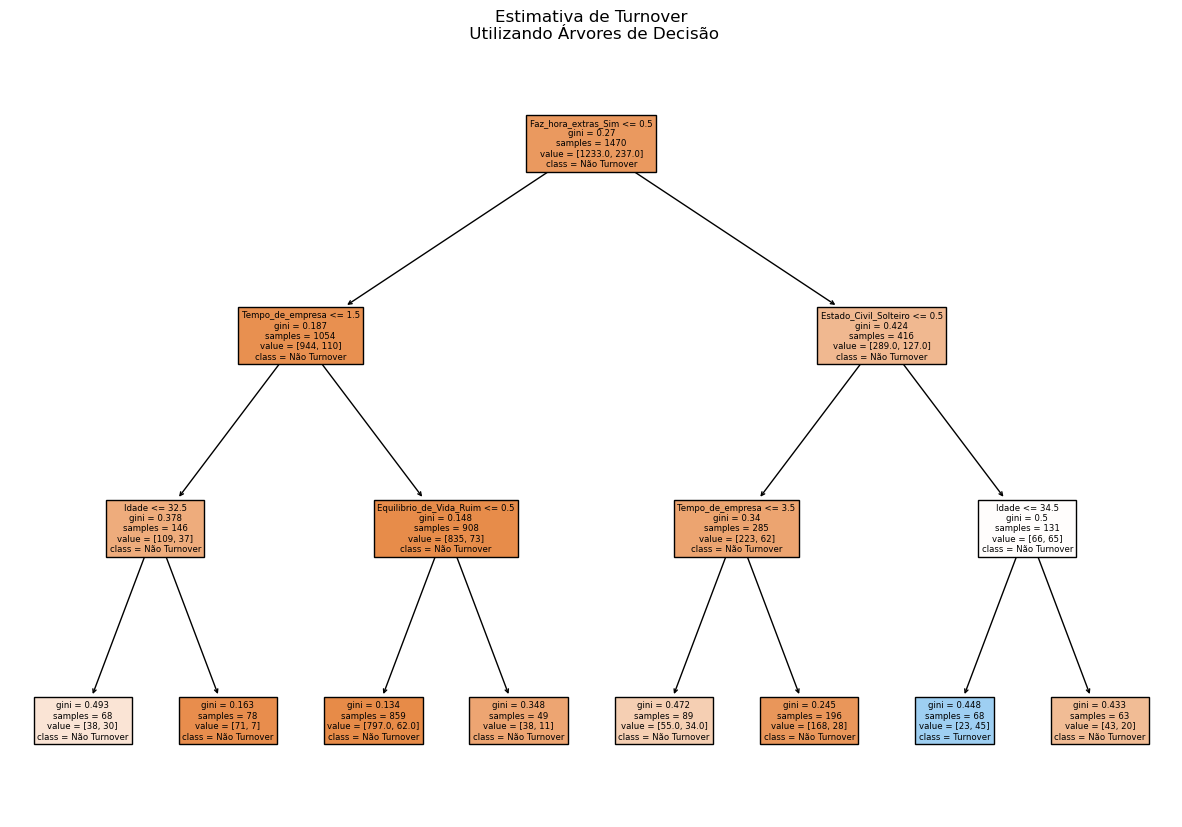

In [14]:
sns.reset_defaults()
%matplotlib inline
fig = plt.figure(figsize=(15,10))
features = list(x.columns)
tree.plot_tree(modelo_turnover,
               feature_names=features, 
               class_names=['Não Turnover','Turnover'],
               filled=True);
plt.title("Estimativa de Turnover\n Utilizando Árvores de Decisão");

#### Desempenho do Modelo

In [16]:
# Cálculo do desempenho do modelo: Acurácia
round(accuracy_score(y, modelo_turnover.predict(x)),2)

0.85